In [13]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data=pd.read_csv('/cxldata/projects/creditcard.csv')
data.head(10) 
data.shape

(284807, 31)

In [26]:
#Store all the rows with all columns except the "Class" column into X, the feature set
X = data.loc[:, data.columns != 'Class']

#Store "Class" values into Y, the label set.
y = data.loc[:, data.columns == 'Class']

#Calculate the percentage of Fraud and Non-fraud transactions.
print(data['Class'].value_counts())
print('Valid Transactions: ', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Fraudulent Transactions: ', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

0    284315
1       492
Name: Class, dtype: int64
Valid Transactions:  99.83 % of the dataset
Fraudulent Transactions:  0.17 % of the dataset


In [31]:
#To get the statistical description of the data
data.describe()

#Check for nulls in the data-the number of nulls found in each column of the data frame
data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

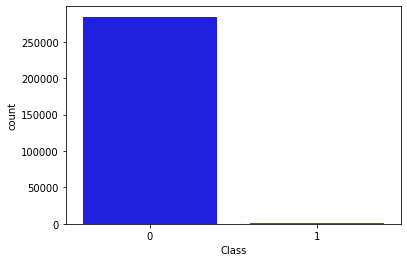

In [30]:
#Mention the colors of the bars to be displayed for each class in the count plot.
colors = ['blue','red']

sns.countplot('Class', data=data, palette=colors)

In [35]:
from sklearn.model_selection import train_test_split

#Split the X, y into train and test sets using
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

#Print the shape of the above split-sets.
print("Transactions in X_train dataset: ", X_train.shape)
print("Transaction classes in y_train dataset: ", y_train.shape)
print("Transactions in X_test dataset: ", X_test.shape)
print("Transaction classes in y_test dataset: ", y_test.shape)

Transactions in X_train dataset:  (199364, 30)
Transaction classes in y_train dataset:  (199364, 1)
Transactions in X_test dataset:  (85443, 30)
Transaction classes in y_test dataset:  (85443, 1)


In [42]:
from sklearn.preprocessing import StandardScaler

#Get StandardScaler() instances
scaler_amount = StandardScaler()
scaler_time = StandardScaler()

#Use fit_transform of scaler_amount on the X_train['Amount'] and save the transformed values in X_train['normAmount']
X_train['normAmount'] = scaler_amount .fit_transform(X_train['Amount'].values.reshape(-1, 1))
#Use transform of scaler_amount on the X_test['Amount'] and save the transformed values in X_test['normAmount'].
X_test['normAmount'] = scaler_amount .fit_transform(X_test['Amount'].values.reshape(-1, 1))
#Use fit_transform of scaler_time on the X_train['Time'] and save the transformed values in X_train['normTime']
X_train['normTime'] = scaler_time .fit_transform(X_train['Time'].values.reshape(-1, 1))
#Use transform of scaler_time on the X_test['Time'] and save the transformed values in X_test['normTime'].
X_test['normTime'] = scaler_time .fit_transform(X_test['Time'].values.reshape(-1, 1))
#Drop Time and Amount columns from X_train and X_test.
X_train = X_train.drop(['Time', 'Amount'], axis=1)
X_test = X_test.drop(['Time', 'Amount'], axis=1)

X_train.head()



/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,normTime
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,...,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,-0.165692,0.402560
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,...,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,-0.352239,0.853047
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,...,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0.330886,0.646288
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,...,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,-0.336067,-1.290102
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,...,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0.005211,1.060059


In [66]:
from imblearn.over_sampling import SMOTE

#Print the number of class-wise samples before over-sampling 
print("Before over-sampling:\n", y_train['Class'].value_counts())

#Declare an instance of SMOTE as sm.
sm = SMOTE()
#Use fit_sample method of sm on X_train and y_train['Class'] and store the resampled features and labels in X_train_res and y_train_res respectively.
X_train_res, y_train_res = sm.fit_sample(X_train, y_train['Class'])
#Print the number of class-wise samples after over-sampling
print("After over-sampling:\n", y_train_res.value_counts())



Before over-sampling:
 0    199019
1       345
Name: Class, dtype: int64
After over-sampling:
 1    199019
0    199019
Name: Class, dtype: int64


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, auc, roc_curve

#Declare some parameters and their values for the grid-search
parameters = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
k = clf.fit(X_train_res, y_train_res)

#Print the best parameters.
print(k.best_params_)




Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.0s
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:   45.1s finished


{'C': 100, 'penalty': 'l2'}


In [87]:
lr_gridcv_best = clf.best_estimator_

y_test_pre = lr_gridcv_best.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test, y_test_pre)
y_train_pre = lr_gridcv_best.predict(X_train_res)
cnf_matrix_train = confusion_matrix(y_train_res, y_train_pre)

#Calculate the recall for test data predictions by the best model.
print("Recall metric in the test dataset:", (cnf_matrix_test[1,1]/(cnf_matrix_test[1,0]+cnf_matrix_test[1,1] )))
#Calculate the recall for resampled train data predictions by the best model.
print("Recall metric in the train dataset:", (cnf_matrix_train[1,1]/(cnf_matrix_train[1,0]+cnf_matrix_train[1,1] )))


Recall metric in the test dataset: 0.9183673469387755
Recall metric in the train dataset: 0.9191534476607761


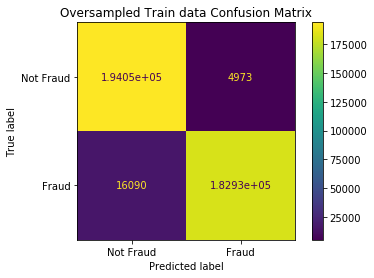

In [94]:
from sklearn.metrics import plot_confusion_matrix

#Class names
class_names = ['Not Fraud', 'Fraud']

#Plot confusion matrix
plot_confusion_matrix(k, X_train_res, y_train_res,  values_format = '.5g', display_labels=class_names) 
plt.title("Oversampled Train data Confusion Matrix")
plt.show()


ROC-AUC: 0.9824368314198687


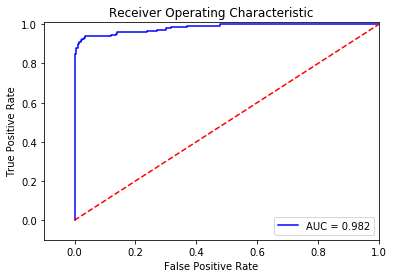

In [97]:
#Receive the resultant scores in y_k.
y_k =  k.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_k)
roc_auc = auc(fpr, tpr)

#Print the roc_auc measure.
print("ROC-AUC:", roc_auc)

#Visualize the roc_auc curve.
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [102]:
'''
Summary

We have been given the Europe credit-card transaction data of 2 days. For privacy reasons, the personal details have been represented in the form of Principle Components. The Amount(the transaction Amount) and Time(the seconds elapsed between each transaction and the first transaction in the dataset) are also part of the columns other than the principal components. The transactions are of valid and fraudulent types. The goal is to build a classifier to detect fraudulent transactions.

We have first loaded the data, explored it, and checked for any null values. While exploring, we found that the data is of high class-imbalance, with around 99.83% being valid transactions whereas about 0.17% are fraudulent.

It is not a good idea to train a classifier with such highly imbalanced data as it leads to mere assumptions rather than learning by the algorithm. We could either undersample or oversample the data to achieve a balance between the class-wise data samples.

We have split the data into train and test parts, in order to prevent any data leakage and to keep the test data untouched, before oversampling.

We have scaled the Amount and Time features using StandardScaler.

We then applied the SMOTE technique to oversample the train data and formed a new dataset with the thus obtained over-sampled datapoints.

We used the GridSearch method with different parameter values, trained logistic regression classifiers with the different combinations of these parameters, and got the best logistic regression classifier which yields the least loss on the over-sampled data-set. All this mechanism is internally implemented by GridSearchCV of sklearn.

We then used the best estimator thus obtained to evaluate its performance on the unseen test data. We calculated the recall, confusion-matrix and roc-auc scores.
'''

'\nSummary\n\nWe have been given the Europe credit-card transaction data of 2 days. For privacy reasons, the personal details have been represented in the form of Principle Components. The Amount(the transaction Amount) and Time(the seconds elapsed between each transaction and the first transaction in the dataset) are also part of the columns other than the principal components. The transactions are of valid and fraudulent types. The goal is to build a classifier to detect fraudulent transactions.\n\nWe have first loaded the data, explored it, and checked for any null values. While exploring, we found that the data is of high class-imbalance, with around 99.83% being valid transactions whereas about 0.17% are fraudulent.\n\nIt is not a good idea to train a classifier with such highly imbalanced data as it leads to mere assumptions rather than learning by the algorithm. We could either undersample or oversample the data to achieve a balance between the class-wise data samples.\n\nWe hav